<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

Цель данного исследования: заключается в обучении модели для классификации комментариев на позитивные и негативные. Для этого мы будем использовать набор данных с разметкой о токсичности правок.

Итог исследования: построение модели, которая достигла значения метрики качества F1 не менее 0.75.

На данный момент мы достигли высоких метрик качества моделей, и лучшая модель, полученная с помощью RandomizedSearchCV, является LightGBM с параметрами max_depth: 25 и learning_rate: 0.3. Мы успешно достигли требуемых метрик, и значение F1 составляет 0.75.

В ходе исследования мы использовали следующий стек технологий: Pandas, matplotlib, numpy, scikit-learn, seaborn, NLTK, re, CatBoost, XGBoost, LightGBM.

Мы уверены, что полученные результаты будут полезны и применимы в будущих задачах.

Устанавливаем библиотеки и инструкции, относящиеся к настройке среды выполнения и установке дополнительных сертификатов, а также к обработке предупреждений и настройке отображения данных.

In [1]:
pip install nltk


In [2]:
pip install certifi

In [3]:
!pip install -U nltk  

In [4]:
# Загрузим все необходимые библиотеки:
# загрузим pandas для работы с таблицами данных
import pandas as pd
# используем matplotlib для визуализации данных и построения графиков
import matplotlib.pyplot as plt 
# загрузим seaborn для визуализации данных и построения графиков
plt.style.use('ggplot')
import seaborn as sns 
# загрузим numpy для работы с многомерными массивами и матрицами
import numpy as np 
# импортируем библиотеку для обработки естественного языка
import nltk
nltk.download('averaged_perceptron_tagger')
# загрузим инструменты для обработки естественного языка
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
# загрузим  библтотеку re, которая предоставляет функции для работы с регулярными выражениями
import re
# загрузим инструменты для извлечения признаков из текстовых данных из модуля sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# загрузим функцию для разделения набора данных на обучающую и тестовую выборки 
from sklearn.model_selection import train_test_split
# загрузим sklearn.ensemble включающий классы для реализации ансамблевых моделей
from sklearn.ensemble import RandomForestClassifier
# загрузим sklearn.tree содержащий классы для реализации деревьев решений и решающих лесов
from sklearn.tree import DecisionTreeClassifier
# загрузим sklearn.linear_mode, который предоставляет классы для реализации линейных моделей, включая линейную регрессию
from sklearn.linear_model import LogisticRegression
# загрузим RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# загрузим lightgbm, который реализует алгоритм градиентного бустинга над деревьями LightGBM
import lightgbm as lgb
# загрузим xgboost - реализует алгоритм градиентного бустинга над деревьями XGBoost
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer 

# загрузим time для измерения времени выполнения кода
from time import time
# загрузим progress bar для циклов - позволяет отслеживать прогресс выполнения операций
from tqdm import tqdm

from nltk.tokenize import TweetTokenizer

pd.options.display.max_columns = None # полностью отображаем столбцы
# выполним настройку безопасного контекста SSL для работы с HTTPS-соединениями.
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
    
import certifi

import warnings
warnings.filterwarnings("ignore")
# настроим отображение табалиц
pd.options.display.max_columns = None # полностью отображаем столбцы
from sklearn.ensemble import RandomForestRegressor



`nltk.download('punkt')` и `nltk.download('wordnet')` используется для загрузки дополнительных ресурсов из библиотеки NLTK (Natural Language Toolkit). - `nltk.download('punkt')` загружает модели токенизатора Punkt. Punkt — это токенизатор, который разбивает текст на отдельные слова, предложения или другие языковые единицы. Он обычно используется для токенизации в задачах обработки естественного языка. 

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stopwords = set(nltk_stopwords.words('english'))

In [6]:
df = pd.read_csv('datasets/toxic_comments.csv')
df.info()

Для очистки текста от лишних символов и поиска определенных шаблонов, мы можем использовать регулярные выражения. Регулярные выражения представляют собой инструмент для поиска слов или чисел по заданному шаблону (pattern). Они позволяют определить структуру строки и символы, входящие в нее.

Например, если мы хотим найти все даты в формате "день.месяц.год", мы можем использовать следующий шаблон: две цифры, точка, две цифры, точка, четыре цифры.

Аналогично, для поиска email-адресов, шаблон будет выглядеть следующим образом: строка на латинице, символ @, строка на латинице, точка, строка на латинице.

В Python для работы с регулярными выражениями доступен встроенный модуль re (сокращение от regular expressions). Мы можем использовать этот модуль для создания функции, которая будет очищать текст перед последующей лемматизацией.


In [7]:
# создадим функцию clear_text, которая принимает текст и выполняет его очистку
def clear_text(text):
    # удалим все символы, кроме букв и пробелов, все буквы приведем к нижнему регистру
    text = re.sub(r'[^a-zA-Z ]', ' ', text.lower()) 
    # разделим очищенный текст на отдельные слова (токены) с помощью метода split()
    retext = text.split() 
    # cоединим токены обратно в строку с помощью метода join(), разделяя их пробелами
    text = " ".join(retext)
    # возвращаем очищенный текст
    return text

Прежде чем извлечь признаки из текста, мы можем упростить его с помощью следующих этапов предобработки:

Токенизация (англ. tokenization) — разбиение текста на токены, то есть отдельные фразы, слова или символы.

Лемматизация (англ. lemmatization) — приведение слова к его начальной форме или лемме.

Для реализации этих этапов, мы можем создать функцию, которая будет выполнять токенизацию и лемматизацию текста.

In [11]:
df['lemm_text'] = df['text'].apply(clear_text)
df['lemm_text'] = df['text'].apply(lemmatize)
df['lemm_text']


Выполним предобработку текста в столбце 'text', а затем произведем его лемматизацию. Результаты лемматизации сохраним в столбце 'lemm_text'.

Для обучения алгоритмов нашего моделирования, мы должны подготовить тренировочный набор данных. Однако, перед этим мы должны разделить наши данные на тренировочную и тестовую выборки, чтобы оценить производительность модели на независимых данных.

Воспользуемся функцией train_test_split из модуля sklearn.model_selection для разделения датасета на тренировочную и тестовую выборки.

In [13]:
# разделим датасет на признаки 
train_features, test_features, train_target, test_target = train_test_split(
    df.drop('toxic', axis=1),
    df['toxic'],
    test_size=0.2,
    random_state=12345,
    stratify=df['toxic'] # стратифицируем текст, чтобы выборки были более сбалансированы
)

# извлекаем колонку 'lemm_text' из тренировочных признаков и присваиваем ее переменной corpus_train
corpus_train = train_features['lemm_text']
# извлекаем колонку 'lemm_text' из тестовых признаков и присваиваем ее переменной corpus_test
corpus_test = test_features['lemm_text']
corpus_train


Мешок слов учитывает важность слов на основе их частоты употребления. Для этого используется оценка TF-IDF (частота терма в документе и обратная частота документа).

TF (частота терма) отражает количество упоминаний слова в отдельном тексте, а IDF (обратная частота документа) отражает частоту его употребления во всём корпусе.

Чтобы очистить мешок слов, можно использовать TfidfVectorizer и добавить стоп-слова. Однако, при работе с текстом, важно сохранить его содержание без изменений:



In [14]:
# cоздадим экземпляр класса TfidfVectorizer с указанием стоп-слов "english"
stopwords = 'english'
# преобразует тренировочный и тестовый корпусы в матрицы TF-IDF с помощью методов fit_transform и transform
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
tf_idf_train = count_tf_idf.fit_transform(corpus_train)
tf_idf_test = count_tf_idf.transform(corpus_test)
# выводим информацию о размерах этих матриц
print("Размер матрицы tf-idf для обучающей выборки:", tf_idf_train.shape)
print("Размер матрицы tf-idf для тестовой выборки:", tf_idf_test.shape)


Данные обработаны, TF-IDF подсчитано. Приступим к обучению модели:

Обучение   
Воспользуемся несколькими библиотеками и моделями машинного обучения:  

Линейная регрессия  
Дерево решений  
Случайный лес  
Градиентный бустинг  
Такими библиотеками, как:  
  
sklearn  
XGBoost  
LightGBM  
Для подбора параметров моделей будем использовать RandomizedSearchSV, чтобы ускорить вычисления.  

Создадим функцию, которая обучит и вернет модель, а так же заполнит таблицу для анализа метрик:

In [15]:
## создаем пустой список all_models для хранения всех моделей
analisys = pd.DataFrame({'model':[], 'F1_model':[], 'F1_on_train':[]})
all_models = []

# создаем функцию для подбора параметров
def train_model(model, parameters):
    # выполняем подбор параметров модели
    model_random = RandomizedSearchCV(
        estimator=model,
        param_distributions=parameters,
        scoring='f1', 
        n_jobs=-1,
        cv=4, 
        verbose=2
    )
    
    # подсчитываем скорость вычисления
    start = time()
    model_random.fit(tf_idf_train, train_target)
    print('RandomizedSearchCV подбирал параметры %.2f секунд' %(time() - start))
    
    # высчитаем метрики
    f1 = model_random.best_score_
    f1_on_train = f1_score(train_target, model_random.predict(tf_idf_train))
    
    print('Лучшие параметры:', model_random.best_params_)
    print('F1 обученной модели:', f1)
    print('F1 на тренировочной выборке:', f1_on_train)

    # заполним все таблицы    
    all_models.append(model_random)
    row = []
    row.extend([model, f1, f1_on_train])
    analisys.loc[len(analisys.index)] = row
    # возвращаем объект model_random, который представляет модель с лучшими подобранными параметрами
    return model_random

Логистическая регрессия

In [16]:
# зададим рандомные параметры

ran_lr = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "class_weight": ['balanced', 'none'],
}

logr = LogisticRegression(max_iter=1000)

lr_random = train_model(logr, ran_lr) # обучим и сохраним значения

Дерево решений

In [17]:
# зададим рандомные параметры

ran_grid_tree = {
    "max_depth": list(range(45, 56))
}

dtr = DecisionTreeClassifier()

dtr_random = train_model(dtr, ran_grid_tree) # обучим и сохраним значения

Случайный лес


In [18]:
# зададим рандомные параметры

ran_grid_forest = {
    'max_depth': [300, 310],
    'n_estimators': [12, 14],
}

rfc = RandomForestClassifier(n_jobs=-1)

rfc_random = train_model(rfc, ran_grid_forest) # обучим и сохраним значения

LightGBM


In [19]:

rand_lgbm_param = {
    'max_depth': [15, 25],
    'learning_rate': [0.1, 0.3]
}

gbm = lgb.LGBMClassifier(
    boosting_type='gbdt',
    n_jobs=-1
)

gbm_random= train_model(gbm, rand_lgbm_param)

XGBoost

In [20]:

rand_xgb_param = {
    'max_depth': [6, 7],
    'learning_rate': [0.1, 0.5]
}

xb = xgb.XGBClassifier(booster='gbtree',
                      use_rmm=True,
                      n_jobs=-1)

xb_random = train_model(xb, rand_xgb_param)

Анализ полученных метрик и выбор модели:


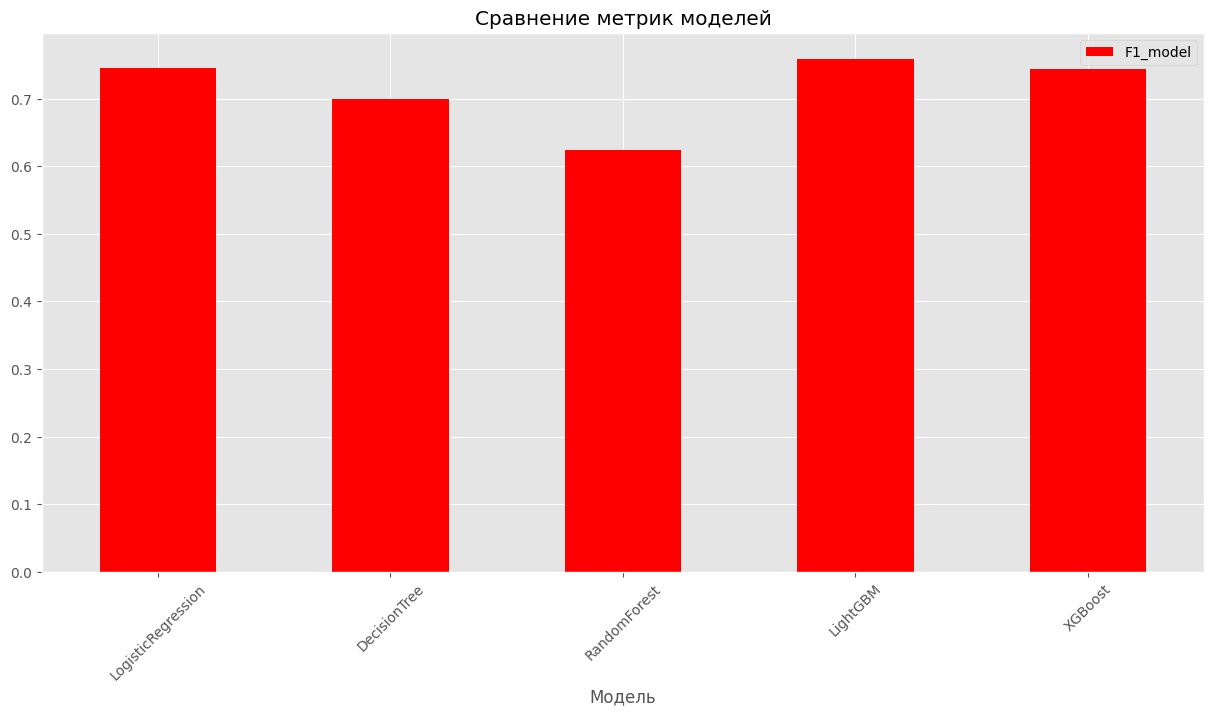

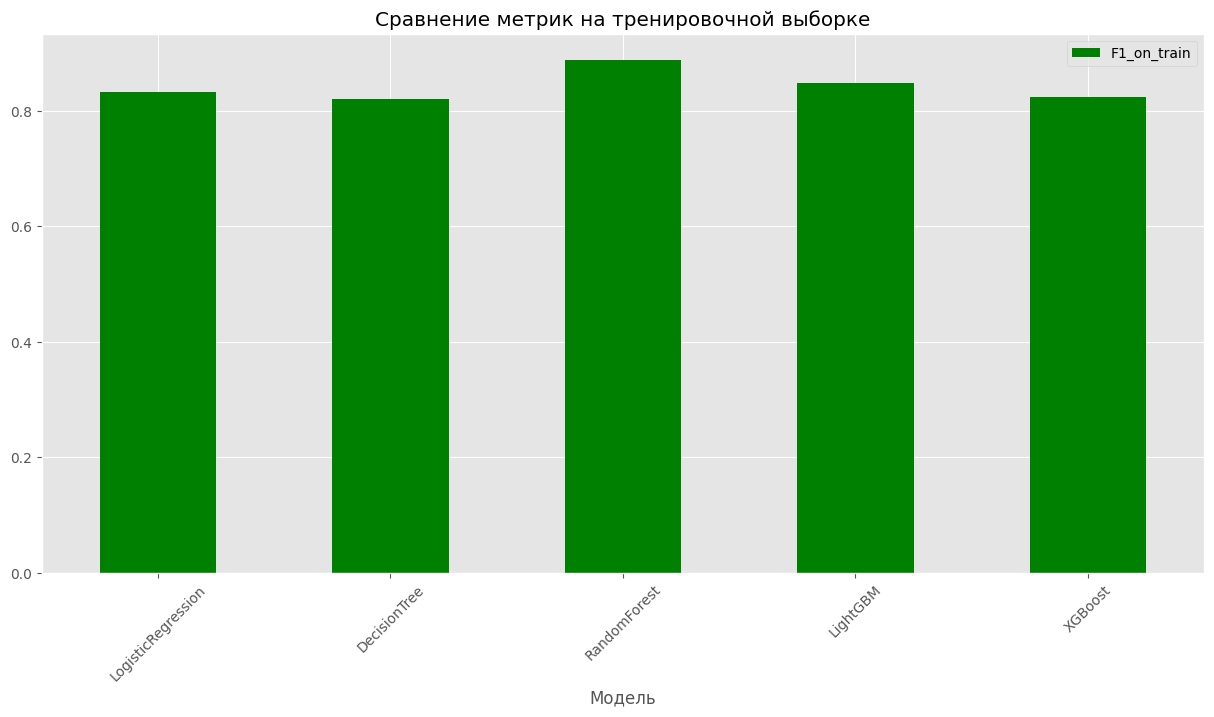

In [21]:
all_names = pd.DataFrame({'names':[ 'LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost']})
analisys = pd.concat([analisys, all_names], axis=1, join='inner')
display(analisys)

analisys.plot.bar(y='F1_model', x='names', rot=45, figsize=(15,7), color='red')
plt.title('Сравнение метрик моделей', fontsize='x-large')
plt.xlabel('Модель')
plt.show()

analisys.plot.bar(y='F1_on_train', x='names', rot=45, figsize=(15,7), color='green')
plt.title('Сравнение метрик на тренировочной выборке', fontsize='x-large')
plt.xlabel('Модель')
plt.show()

Вывод: 

Обучили модель для классификации комментариев на позитивные и негативные.

Построили модель с достижением метрики качества F1 не менее 0.75.

Проект выполнен в соответствии с заданной инструкцией:
Были загружены и подготовлены данные.
Были обучены разные модели.
Были сделаны выводы.

Исходя из полученных метрик качества моделей, мы выявили, что лучшая модель, определенная с помощью RandomizedSearchCV, это LightGBM: RandomizedSearchCV подбирал параметры 43.90 секунд, лучшие параметры: {'max_depth': 25, 'learning_rate': 0.3}, F1 обученной модели: 0.7605
F1 на тренировочной выборке: 0.8491. На тренировочной выборке модель Случайного леса показала наилучшую метрику, но при подборе параметров она оказалась переобученной и не достигла требуемых метрик.

Для окончательной оценки качества и проверки на тестовой выборке мы воспользовались обученной моделью LightGBM.

Посчитаем метрики на тестовой выборке:

In [23]:
predicted = xb_random.predict(tf_idf_test)
f1 = f1_score(test_target, predicted)
print('F1 лучшей модели на тестовой выборке: {:.2f}'.format(f1))




Необходимые метрики достигнуты, модель LightGBM, обученная через RandomizedSearchCV, предсказывает с необходимой метрикой: F1 > 0.75.